#開始

In [37]:
import csv
import pandas as pd
import os
import glob
encoding = 'SHIFT_JIS'
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
#files = glob.glob('/content/*.csv')
files = os.listdir('/content')
for file in files:
  print(file)

.config
.ipynb_checkpoints
241106_50min.csv
241106_10min.csv
241106_5min.csv
241106_60min.csv
241106_30min.csv
241106_20min.csv
241106_40min.csv
sample_data


### グラフ表示

In [66]:
file_name = "241106_60min.csv" # @param {type:"string"}
#t = 0.7263 # @param {type:"number"}
#0.4152
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, 0]], axis=1)
#df = df - t
df[(df<=0)] = 0

m = df.median().median()#df[(df>=m-w)&(df<=m+w)] = m
#df.to_csv(file_name+'(z).csv', index=False)
#df = df - m

241106_5min.csv.png
0.08719
(56, 112)


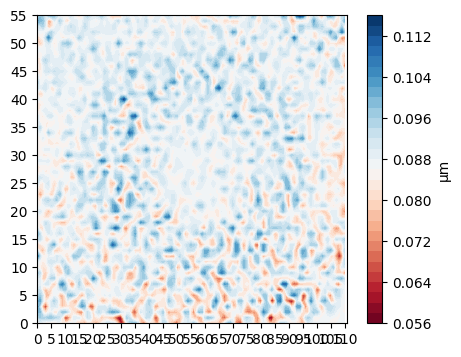

In [39]:
x = 0.04 # @param {type:"number"}
#df[(df<=-x)] = -x##df = df.iloc[3:-2, 4:-4]df[0,0] = -x
#dfu=df*1000
#df[(df>=m+x)] = m+x
#df[(df<=m-x)] = m-x
color = "RdBu" # @param {type:"string"}
l = 36 # @param {type:"number"}
cmap = plt.get_cmap(color)
plt.figure(figsize=(5, 4))
plt.contourf(df.values,cmap=cmap,levels=l)
plt.colorbar(label='µm')#plt.axis('scaled')
#plt.axis("on")
plt.xticks(np.arange(0, df.shape[1], 5))
plt.yticks(np.arange(0, df.shape[0], 5))

#plt.grid()
print(file_name+".png")
print(m)
print(df.shape)
plt.show()

### 収率計算

In [ ]:
w = 0.003
p = df.iloc[6:-6,6:-6][(df>=-w)&(df<=w)].count().sum() /df.iloc[6:-6,6:-6].size
#p = df.iloc[6:-6,9:-9][(df>=-w)&(df<=w)].count().sum() /df.iloc[6:-6,9:-9].size
print(p)

0.5618492294877134


In [16]:
df.to_csv(file_name+'(z).csv', index=False)


### memo

In [23]:
file_name = "241106_10min.csv(z).csv" # @param {type:"string"}
dfa = pd.read_csv("/content/"+file_name)#

In [67]:
dfa = pd.DataFrame(index=np.arange(10), columns=np.arange(10))
for i in range(10):
    for j in range(10):
        max=df.iloc[i*5:i*5+4, j*10:j*10+9].max().max()
        min=df.iloc[i*5:i*5+4, j*10:j*10+9].min().min()
        men=df.iloc[i*5:i*5+4, j*10:j*10+9].mean().mean()
        dfa.iloc[i, j] = (max-min)/men

In [70]:
dfa = pd.DataFrame(index=np.arange(10), columns=np.arange(10))
for i in range(10):
    for j in range(10):
        dfa.iloc[i, j] = df.iloc[i*3+2:i*3+4, j*500:j*500+499][(df > 0)].median().median()

In [105]:
dfa = pd.DataFrame(index=np.arange(15), columns=np.arange(15))
for i in range(15):
    for j in range(15):
        dfa.iloc[i, j] = df.iloc[i*2:i*2+1, j*333:j*333+444][(df > 0.05)].median().median()

<ipython-input-68-ea28fd59df15>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfa = dfa.fillna(0).replace([np.inf, -np.inf], 0)


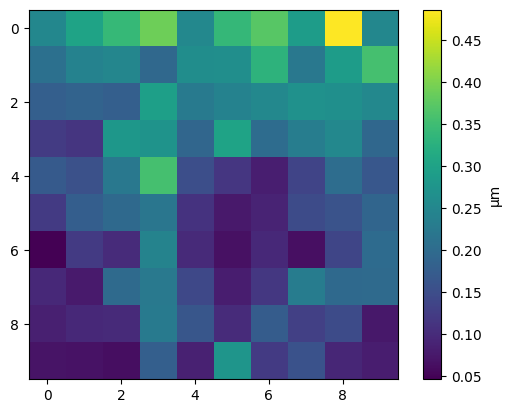

In [68]:
dfa = dfa.fillna(0).replace([np.inf, -np.inf], 0)
dfa = dfa.apply(pd.to_numeric, errors='coerce').fillna(0)

plt.imshow(dfa.values)
plt.colorbar(label='µm')#plt.axis('scaled')

plt.show()

In [56]:
dfa.to_csv(file_name+'(z).csv', index=False)
#fig.savefig("img.png",transparent=True)

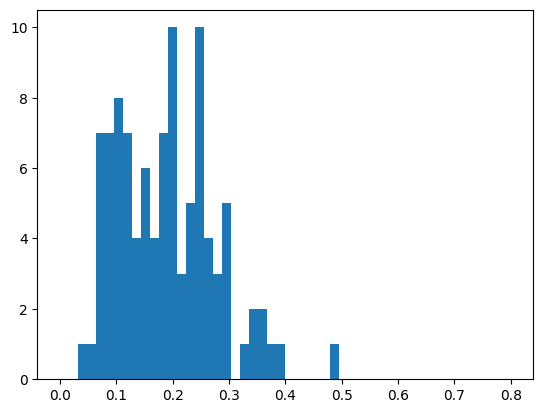

0.04634407995031326 0.4858880751131324 0.18417642503507411


In [69]:
plt.hist(dfa.values.flatten(), bins=50,range=(0.0,0.8))
plt.show()
print(dfa.min().min(),dfa.max().max(),dfa.median().median())

## 収率

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X = df.index.values
Y = df.columns.values
Z = df.values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(Y, X, Z, 100, cmap='seismic')
ax.set_ylim(X.min(),X.max())
ax.set_xlim(0,120)
plt.show()

差分

In [ ]:
file_name = "240930-2.csv" # @param {type:"string"}
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)

file_name = "240930-2-dev.csv" # @param {type:"string"}
t = 0.733 # @param {type:"number"}
x = 0.05 # @param {type:"number"}
dfb=df
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)
df=dfb-df+t
df[(df>x)] = x
df[(df<0)] = 0

In [ ]:
df = df.iloc[8:75, 10:110]
#df = df.iloc[:, :-11]
#pall = df[(df>=m-w)&(df<=m+w)].count().sum()   /df.size#pinn = df.iloc[9:120,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120, 9:120].size#pinn = df.iloc[4:60,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,9:120].size
##
pall = df.iloc[4:126,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:126,9:120].size
#pall = df.iloc[2:63,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[2:63,9:120].size
##
pinn = df.iloc[9:120,20:105][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120,20:105].size
#pinn = df.iloc[4:60,19:110][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,19:110].size
##pall =round(pall*100,1)pinn =round(pinn*100,1)
#df.iloc[2:63,9:120]=m-x
#df.iloc[4:60,19:110]=m+x
###
##pall = df.iloc[4:126,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:126,9:120].size
#pinn = df.iloc[9:120,20:105][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120,20:105].size
##pall =round(pall*100,1)
##pinn =round(pinn*100,1)
#plt.title(str(pall)+" %", loc='right', color='darkgreen')
#plt.title(str(pinn)+" %", loc='center', color='black')

In [ ]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('bwr')
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())

im = ax.imshow(df, cmap=cmap, norm=norm)
ax.set_title(str(pall)+" %", loc='right', color='darkgreen')
ax.set_title(str(pinn)+" %", loc='center', color='black')
print(file_name+".png")
plt.show()

In [ ]:
df[(df>=m-w)&(df<=m+w)] = m
#df.iloc[23:41, 41:59] = m
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
cmap = plt.get_cmap('bwr')
fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap, norm=norm)

ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
ax.set_title(str(round(m*1000,1))+"µ", loc='left') #makuatsu
ax.set_title(str(pall)+"% 130□", loc='right')
ax.set_title(str(pinn)+"% 110□", loc='center')
#ax.grid()
#ax.set_ylim(10, 140)#ax.set_xlim(-65,65)
print(file_name+".png")
#fig.colorbar(im)
plt.show()#

等高線

In [ ]:
fig, ax = plt.subplots()

norm = mcolors.Normalize(vmin=m-x, vmax=m+x)
cmap = plt.get_cmap('bwr')
im = ax.imshow(df, cmap=cmap, norm=norm)
#plt.figure(figsize=(5, 4))
#ax.set_xticks(np.arange(0, 131, step=10))
#ax.set_yticks(np.arange(0, 131, step=10))
for i in range(0, 14, 13):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-122)/2, (130+122)/2],linestyle = "--", color='darkgreen', linewidth=2)
for j in range(0, 21, 20):
    plt.plot([(130-114)/2, (130+114)/2],[(130-122)/2+j*122/20, (130-122)/2+j*122/20],linestyle = "--", color='darkgreen', linewidth=2)
for i in range(1, 12, 10):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-110)/2, (130+110)/2],linestyle = "--", color='black', linewidth=2)
for j in range(1, 20, 18):
    plt.plot([(130-95)/2, 104],[(130-122)/2+j*122/20, (130-122)/2+j*122/20],linestyle = "--", color='black', linewidth=2)

plt.show()